In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dig = load_digits()
onehot_target = pd.get_dummies(dig.target)
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class MyNN:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        self.lr = 0.5
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)

    def backprop(self):
        loss = error(self.a3, self.y)
        print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()

model = MyNN(x_train/16.0, np.array(y_train))

epochs = 1500
for x in range(epochs):
    model.feedforward()
    model.backprop()

def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100

print("Training accuracy : ", get_acc(x_train/16, np.array(y_train)))
print("Test accuracy : ", get_acc(x_val/16, np.array(y_val)))

Error : 11.81112954963196
Error : 8.50924844835078
Error : 7.196481041417363
Error : 5.385626715337664
Error : 4.723937313116178
Error : 3.2737765540360786
Error : 2.648079279159199
Error : 1.8471012209762259
Error : 1.6032017686449915
Error : 1.1067297130318319
Error : 1.0283030684700931
Error : 0.9133552272924328
Error : 0.8999059829987021
Error : 0.8523532625240151
Error : 0.8293552913055807
Error : 0.8058172633997924
Error : 0.7588321969165087
Error : 0.7389360676935378
Error : 0.6830354927734819
Error : 0.6567281364647647
Error : 0.6102488302844998
Error : 0.5821744842636768
Error : 0.5471486840320942
Error : 0.5225976631785649
Error : 0.49703552028758863
Error : 0.4776190215274494
Error : 0.45897458725301554
Error : 0.4439798003739722
Error : 0.43003040364218426
Error : 0.41820018232777345
Error : 0.40726794162116375
Error : 0.39754039254896895
Error : 0.3884913562604712
Error : 0.38014716949214516
Error : 0.37229760669436035
Error : 0.364902889064116
Error : 0.3578789587954871
E

Error : 0.06861780212828635
Error : 0.06840447615766812
Error : 0.06819237917962924
Error : 0.06798150035671478
Error : 0.06777182898328919
Error : 0.06756335448347238
Error : 0.0673560664091152
Error : 0.0671499544378132
Error : 0.06694500837095774
Error : 0.06674121813182432
Error : 0.06653857376369614
Error : 0.06633706542802344
Error : 0.06613668340261694
Error : 0.06593741807987483
Error : 0.06573925996504297
Error : 0.065542199674507
Error : 0.06534622793411618
Error : 0.06515133557753797
Error : 0.06495751354464271
Error : 0.06476475287991802
Error : 0.06457304473091209
Error : 0.0643823803467049
Error : 0.06419275107640769
Error : 0.0640041483676889
Error : 0.0638165637653272
Error : 0.06362998890978996
Error : 0.06344441553583777
Error : 0.06325983547115295
Error : 0.0630762406349933
Error : 0.06289362303686896
Error : 0.06271197477524329
Error : 0.06253128803625592
Error : 0.06235155509246863
Error : 0.06217276830163309
Error : 0.06199492010547988
Error : 0.06181800302852866


Error : 0.03460911183125952
Error : 0.03454613727855755
Error : 0.034483359251259144
Error : 0.03442077687882395
Error : 0.034358389296715246
Error : 0.034296195646345264
Error : 0.03423419507502137
Error : 0.03417238673589171
Error : 0.03411076978789176
Error : 0.03404934339569065
Error : 0.03398810672963795
Error : 0.03392705896571076
Error : 0.0338661992854607
Error : 0.03380552687596166
Error : 0.03374504092975731
Error : 0.03368474064480924
Error : 0.0336246252244451
Error : 0.03356469387730722
Error : 0.03350494581730122
Error : 0.03344538026354534
Error : 0.03338599644031946
Error : 0.03332679357701496
Error : 0.033267770908084505
Error : 0.03320892767299222
Error : 0.03315026311616424
Error : 0.033091776486939464
Error : 0.03303346703952065
Error : 0.03297533403292578
Error : 0.03291737673093981
Error : 0.03285959440206663
Error : 0.032801986319481495
Error : 0.03274455176098367
Error : 0.03268729000894937
Error : 0.0326302003502852
Error : 0.032573282076381736
Error : 0.032516

Error : 0.022196422184306393
Error : 0.02216764540544833
Error : 0.02213893617366419
Error : 0.022110294264663655
Error : 0.022081719455066914
Error : 0.022053211522400803
Error : 0.02202477024509486
Error : 0.021996395402477543
Error : 0.021968086774772314
Error : 0.021939844143094054
Error : 0.02191166728944489
Error : 0.021883555996710657
Error : 0.021855510048657035
Error : 0.02182752922992579
Error : 0.02179961332603097
Error : 0.021771762123355177
Error : 0.02174397540914583
Error : 0.02171625297151153
Error : 0.021688594599418118
Error : 0.02166100008268527
Error : 0.02163346921198255
Error : 0.021606001778825924
Error : 0.021578597575573996
Error : 0.021551256395424413
Error : 0.02152397803241015
Error : 0.021496762281395996
Error : 0.02146960893807489
Error : 0.021442517798964257
Error : 0.021415488661402613
Error : 0.021388521323545764
Error : 0.02136161558436339
Error : 0.021334771243635503
Error : 0.02130798810194879
Error : 0.021281265960693286
Error : 0.021254604622058696

Error : 0.016019837501408948
Error : 0.016003942324154072
Error : 0.015988075892468638
Error : 0.015972238130960187
Error : 0.01595642896449434
Error : 0.01594064831819373
Error : 0.01592489611743691
Error : 0.015909172287857373
Error : 0.015893476755342355
Error : 0.01587780944603192
Error : 0.015862170286317798
Error : 0.01584655920284244
Error : 0.015830976122497915
Error : 0.015815420972424894
Error : 0.01579989368001159
Error : 0.015784394172892836
Error : 0.015768922378948915
Error : 0.015753478226304678
Error : 0.01573806164332846
Error : 0.015722672558631093
Error : 0.015707310901064902
Error : 0.015691976599722768
Error : 0.015676669583937024
Error : 0.015661389783278565
Error : 0.01564613712755581
Error : 0.015630911546813786
Error : 0.015615712971333087
Error : 0.015600541331628937
Error : 0.015585396558450237
Error : 0.015570278582778603
Error : 0.015555187335827433
Error : 0.01554012274904083
Error : 0.015525084754092899
Error : 0.01551007328288657
Error : 0.01549508826755

Error : 0.012401449145639289
Error : 0.01239148292837163
Error : 0.012381531311552677
Error : 0.01237159426417728
Error : 0.01236167175532682
Error : 0.012351763754168974
Error : 0.012341870229957272
Error : 0.012331991152030942
Error : 0.012322126489814544
Error : 0.012312276212817668
Error : 0.012302440290634714
Error : 0.01229261869294448
Error : 0.01228281138951
Error : 0.012273018350178161
Error : 0.012263239544879458
Error : 0.01225347494362773
Error : 0.012243724516519788
Error : 0.01223398823373524
Error : 0.012224266065536126
Error : 0.012214557982266644
Error : 0.012204863954352954
Error : 0.012195183952302785
Error : 0.01218551794670521
Error : 0.012175865908230362
Error : 0.012166227807629187
Error : 0.012156603615733105
Error : 0.012146993303453812
Error : 0.012137396841782905
Error : 0.01212781420179175
Error : 0.012118245354631072
Error : 0.012108690271530772
Error : 0.012099148923799635
Error : 0.012089621282825045
Error : 0.012080107320072761
Error : 0.0120706070070865

In [12]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

(1797, 64)


<Figure size 432x288 with 0 Axes>

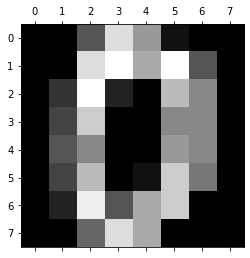

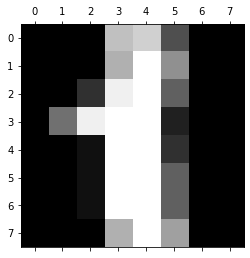

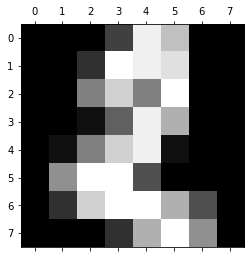

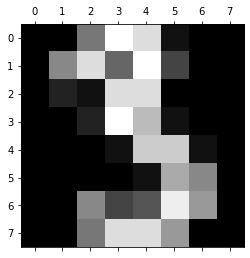

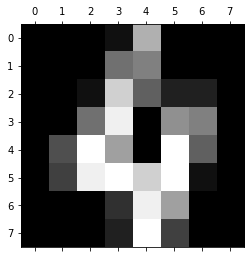

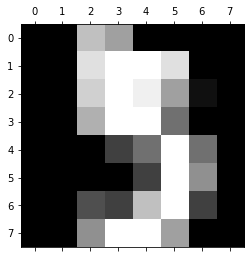

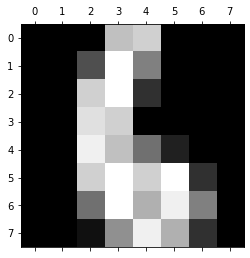

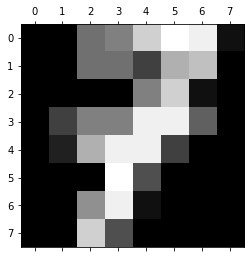

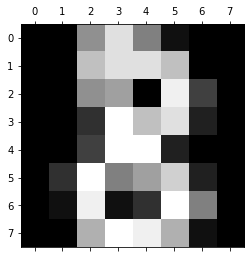

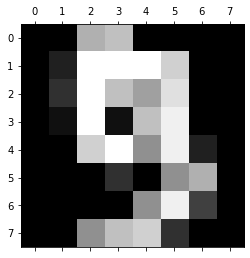

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 

for i in range(10):
    plt.matshow(digits.images[i]) 
    plt.show() 

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

path = r'C:\Users\Vicky Kumar\Desktop\AI training\MY WORLD\CSV FOR PYTHON'
url = "https://raw.githubusercontent.com/baatout/ml-in-prod/master/pima-indians-diabetes.csv"

features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
label = 'label'
dataframe = read_csv(url, names=features + [label])

X = dataframe[features]
Y = dataframe[label]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train, X_test, Y_train, Y_test

(     preg  plas  pres  skin  test  mass   pedi  age
 464    10   115    98     0     0  24.0  1.022   34
 223     7   142    60    33   190  28.8  0.687   61
 393     4   116    72    12    87  22.1  0.463   37
 766     1   126    60     0     0  30.1  0.349   47
 570     3    78    70     0     0  32.5  0.270   39
 ..    ...   ...   ...   ...   ...   ...    ...  ...
 71      5   139    64    35   140  28.6  0.411   26
 106     1    96   122     0     0  22.4  0.207   27
 270    10   101    86    37     0  45.6  1.136   38
 435     0   141     0     0     0  42.4  0.205   29
 102     0   125    96     0     0  22.5  0.262   21
 
 [514 rows x 8 columns],
      preg  plas  pres  skin  test  mass   pedi  age
 668     6    98    58    33   190  34.0  0.430   43
 324     2   112    75    32     0  35.7  0.148   21
 624     2   108    64     0     0  30.8  0.158   21
 690     8   107    80     0     0  24.6  0.856   34
 473     7   136    90     0     0  29.9  0.210   50
 ..    ...   ...   

In [21]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist

<module 'keras.datasets.mnist' from 'C:\\Users\\Vicky Kumar\\Anaconda3\\lib\\site-packages\\keras\\datasets\\mnist.py'>

In [24]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

3


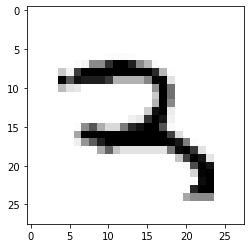

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

image_index = 53156
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

# IndexError: index 98356 is out of bounds for axis 0 with size 60000

In [33]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [34]:
print(y_train[:image_index + 1])

[5 0 4 ... 9 8 3]


In [60]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print(x_train.shape, x_test.shape)

x_train /= 255
x_test /= 255

(60000, 28, 28, 1) (10000, 28, 28, 1)


TypeError: No loop matching the specified signature and casting was found for ufunc true_divide

In [46]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train, y_test

(array([[[[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          [1., 0., 0., ..., 0., 0., 0.],
          ...,
          [1., 0., 0., ..., 0., 0., 0.],
          [1.

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

In [53]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [54]:
model.add(Dropout(0.25))

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [57]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [58]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (60000, 10, 10, 10)

In [69]:
# !pip install imageio

# import imageio
from PIL import Image 
import numpy as np
from matplotlib import pyplot as plt

im = Image.open(r"C:\Users\Vicky Kumar\Pictures\Saved Pictures\5.png")  
# im = imageio.imread("https://i.imgur.com/a3Rql9C.png")
im

In [64]:
# get_ipython().system('pip install imageio')

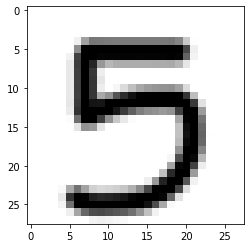

In [72]:
# gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(im, cmap = plt.get_cmap('gray'))
plt.show()

In [74]:
# reshape the image
im = im.reshape(1, img_rows, img_cols, 1)

# normalize image
im /= 255

AttributeError: 'PngImageFile' object has no attribute 'reshape'

In [77]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(im)
print(prediction.argmax())

OSError: Unable to open file (unable to open file: name = 'test_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

> 98.633
> 98.150
> 99.017
> 99.150
> 98.925


C:\Users\Vicky Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Vicky Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


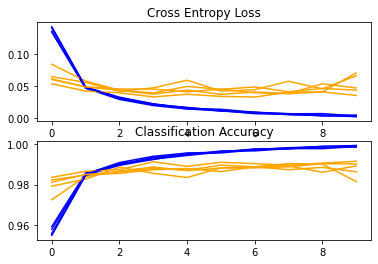

Accuracy: mean=98.775 std=0.356, n=5


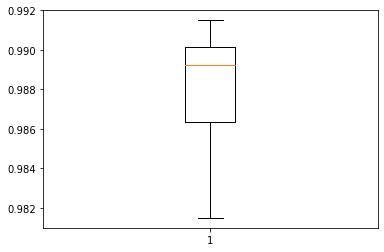

In [78]:
# # deeper cnn model for mnist
# from numpy import mean
# from numpy import std
# from matplotlib import pyplot
# from sklearn.model_selection import KFold
# from keras.datasets import mnist
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.optimizers import SGD

# # load train and test dataset
# def load_dataset():
#     # load dataset
#     (trainX, trainY), (testX, testY) = mnist.load_data()
#     # reshape dataset to have a single channel
#     trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
#     testX = testX.reshape((testX.shape[0], 28, 28, 1))
#     # one hot encode target values
#     trainY = to_categorical(trainY)
#     testY = to_categorical(testY)
#     return trainX, trainY, testX, testY

# # scale pixels
# def prep_pixels(train, test):
#     # convert from integers to floats
#     train_norm = train.astype('float32')
#     test_norm = test.astype('float32')
#     # normalize to range 0-1
#     train_norm = train_norm / 255.0
#     test_norm = test_norm / 255.0
#     # return normalized images
#     return train_norm, test_norm

# # define cnn model
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(lr=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# # evaluate a model using k-fold cross-validation
# def evaluate_model(dataX, dataY, n_folds=5):
#     scores, histories = list(), list()
#     # prepare cross validation
#     kfold = KFold(n_folds, shuffle=True, random_state=1)
#     # enumerate splits
#     for train_ix, test_ix in kfold.split(dataX):
#         # define model
#         model = define_model()
#         # select rows for train and test
#         trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
#         # fit model
#         history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
#         # evaluate model
#         _, acc = model.evaluate(testX, testY, verbose=0)
#         print('> %.3f' % (acc * 100.0))
#         # stores scores
#         scores.append(acc)
#         histories.append(history)
#     return scores, histories

# # plot diagnostic learning curves
# def summarize_diagnostics(histories):
#     for i in range(len(histories)):
#         # plot loss
#         pyplot.subplot(2, 1, 1)
#         pyplot.title('Cross Entropy Loss')
#         pyplot.plot(histories[i].history['loss'], color='blue', label='train')
#         pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
#         # plot accuracy
#         pyplot.subplot(2, 1, 2)
#         pyplot.title('Classification Accuracy')
#         pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
#         pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
#     pyplot.show()

# # summarize model performance
# def summarize_performance(scores):
#     # print summary
#     print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
#     # box and whisker plots of results
#     pyplot.boxplot(scores)
#     pyplot.show()

# # run the test harness for evaluating a model
# def run_test_harness():
#     # load dataset
#     trainX, trainY, testX, testY = load_dataset()
#     # prepare pixel data
#     trainX, testX = prep_pixels(trainX, testX)
#     # evaluate model
#     scores, histories = evaluate_model(trainX, trainY)
#     # learning curves
#     summarize_diagnostics(histories)
#     # summarize estimated performance
#     summarize_performance(scores)

# # entry point, run the test harness
# run_test_harness()

In [79]:
# C:\Users\Vicky Kumar\Pictures\Saved Pictures

In [82]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image(r'C:\Users\Vicky Kumar\Desktop\python py files\mnist_png\mnist_png\training\4\1568.png')
    # load model
    model = load_model(r'C:\Users\Vicky Kumar\Desktop\python py files\RealTime-DigitRecognition\cnn_model\digit_classifier.h5')            
    # predict the class
    digit = model.predict_classes(img)
    print(digit[0])

# entry point, run the example
run_example()

C:\Users\Vicky Kumar\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


3


In [83]:
# =========================( MNIST dataset, digit recognition )===========================

In [163]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

8


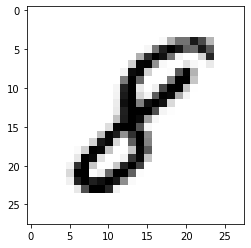

In [164]:
import matplotlib.pyplot as plt
# %matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [165]:
x_train.shape

(60000, 28, 28)

In [166]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [167]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [169]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 51s 854us/step - loss: 0.2029 - accuracy: 0.9384
Epoch 2/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.0816 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 53s 884us/step - loss: 0.0582 - accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 59s 979us/step - loss: 0.0432 - accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0351 - accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 51s 855us/step - loss: 0.0294 - accuracy: 0.9902
Epoch 7/10
60000/60000 [==============================] - 50s 833us/step - loss: 0.0252 - accuracy: 0.9913
Epoch 8/10
60000/60000 [==============================] - 49s 816us/step - loss: 0.0223 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 48s 805us/step - loss: 0.0194 - accuracy: 0.9935
Epoch 10/10
60000/60000 [============

In [170]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 127us/step


[0.06481999841708815, 0.9848999977111816]

9


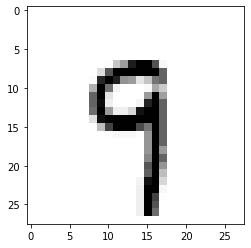

In [178]:
image_index = 9272
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

# IndexError: index 34565 is out of bounds for axis 0 with size 10000

In [6]:
from keras.preprocessing.image import load_img
im = load_image(r"C:\Users\Vicky Kumar\Pictures\Saved Pictures\9.png")

plt.imshow(im.reshape(28, 28),cmap='Greys')
pred = model.predict(im.reshape(1, img_rows, img_cols, 1))
print('Predicted Digit : ', pred.argmax())

NameError: name 'load_image' is not defined

In [3]:
import cv2, time, os
from PIL import Image
from keras.preprocessing.image import load_img

while True:
    print('\n..which camera wanna use ?\n')
    print('1). Laptop')
    print('2). IP WebCam')
    print('...any-thing else to EXIT.')
    camera = input('\nWhich Camera wanna use : ')

    if camera == '1':
        url = 0
    elif camera == '2':
        url = 'http://10.71.220.102:8080/video'
    else:
        break

    video = cv2.VideoCapture(url)

    a = 1
    photo = r'C:\Users\Vicky Kumar\Pictures\Saved Pictures\mnist.jpg'

    while True:

        a = a + 1
        check, frame = video.read()
    #     print(frame)

    #     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('Capturing', frame)
        key = cv2.waitKey(1)
    #     print(key)
        if key == ord(' '):
            break

    # print(a)
    # print(ord('q'))
    video.release()
    cv2.destroyAllWindows()

    cv2.imwrite(photo, frame)
#     key = cv2.waitKey(2000)
#     os.startfile(photo)

    try:
        im = load_image(photo)
#         plt.imshow(im.reshape(28, 28),cmap='Greys')
        pred = model.predict(im.reshape(1, img_rows, img_cols, 1))
        print('\n\t>>> Predicted Digit : ', pred.argmax())

    except Exception as e:
        print('Error : {}'.format(e))
        
print('exited, Thanks for using my MNIST Scanner !!!')


..which camera wanna use ?

1). Laptop
2). IP WebCam
...any-thing else to EXIT.

Which Camera wanna use : 1
Error : name 'load_image' is not defined

..which camera wanna use ?

1). Laptop
2). IP WebCam
...any-thing else to EXIT.

Which Camera wanna use : k
exited, Thanks for using my MNIST Scanner !!!


In [2]:
load_img

<function keras_preprocessing.image.utils.load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest')>

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import cv2 as cv

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

# -------------------------- CREATE MODEL ------------------------------

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# ----------------------------------------------------------------------

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

# ----------------------------------------------------------------------
model.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.2073 - accuracy: 0.9374
Epoch 2/10
60000/60000 [==============================] - 48s 806us/step - loss: 0.0803 - accuracy: 0.9758s - l
Epoch 3/10
60000/60000 [==============================] - 54s 894us/step - loss: 0.0572 - accuracy: 0.9828
Epoch 4/10
60000/60000 [==============================] - 50s 842us/step - loss: 0.0445 - accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 50s 826us/step - loss: 0.0339 - accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 54s 901us/step - loss: 0.0296 - accuracy: 0.9900
Epoch 7/10
60000/60000 [==============================] - 52s 871us/step - loss: 0.0252 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 54s 895us/step - loss: 0.0196 - accuracy: 0.9936
Epoch 9/10
60000/60000 [==============================] - 52s 863us/step - loss: 0.0182 - accuracy: 0.9938
Epoch 10/10
10000/10000 [=======

[0.06577809237528681, 0.9847999811172485]

In [19]:
type(model)

keras.engine.sequential.Sequential

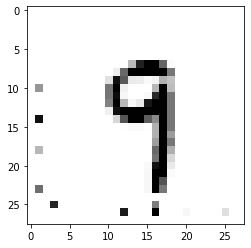

9


In [15]:
# model = tf.keras.models.load_model(r'C:\Users\Vicky Kumar\Desktop\python py files\RealTime-DigitRecognition\cnn_model\digit_classifier.h5')            
# model = tf.keras.models.load_model("C:/Users/A551110/PycharmProjects/keras_mnist/venv/mnistv2.model")
file = r"C:\Users\Vicky Kumar\Pictures\Saved Pictures\9.png"

image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28,28))
image = 255-image          #inverts image. Always gets read inverted.

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

print(pred.argmax())

In [3]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
import cv2, os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

def train():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
    x_train /= 255
    x_test /= 255

    # -------------------------- CREATE MODEL ------------------------------

    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=tf.nn.softmax))

    # ----------------------------------------------------------------------

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x=x_train,y=y_train, epochs= 12)

    # ----------------------------------------------------------------------
    model.evaluate(x_test, y_test)
    return model

def test(model):
    print('\n..which camera wanna use ?\n')
    print('1). Laptop')
    print('2). IP WebCam')
    print('...any-thing else to EXIT.')
    camera = input('\nWhich Camera wanna use : ')

    if camera == '1':
        url = 0
    elif camera == '2':
        url = 'http://10.71.220.102:8080/video'
    else : url = 0
        
    photo = r'C:\Users\Vicky Kumar\Pictures\Saved Pictures\mnist.jpg'

    while True:
        try:
            video = cv2.VideoCapture(url)
        except : continue
            
        while True:
            check, frame = video.read()
            cv2.imshow('Capturing', frame)
            key = cv2.waitKey(1)
            if key == ord(' '):
                break

        video.release()
        cv2.destroyAllWindows()
        cv2.imwrite(photo, frame)

        try:
            image = cv2.imread(photo, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (28,28))
            image = 255-image          #inverts image. Always gets read inverted.
            plt.imshow(image.reshape(28, 28),cmap='Greys')
            plt.show()
            pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
            print('=====================================\n\t>>> Predicted Digit : ', pred.argmax())

        except Exception as e:
            print('Error : {}'.format(e))
                    
if __name__ == "__main__":
    test(train())
        
print('exited, Thanks for using my MNIST Scanner !!!')

Using TensorFlow backend.


Epoch 1/1
10000/10000 [==============================] - 4s 383us/step

..which camera wanna use ?

1). Laptop
2). IP WebCam
...any-thing else to EXIT.

Which Camera wanna use : 2
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8
	>>> Predicted Digit :  9
	>>> Predicted Digit :  8
	>>> Predicted Digit :  8


In [ ]:
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d